<a href="https://colab.research.google.com/github/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/T12_EXTRA_kmeans_e_hcluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adquirindo os dados

In [74]:
import pandas as pd
import seaborn as sns

# df = sns.load_dataset('iris')
# df.head()

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Seleção dos dados `X`

In [75]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [76]:
# X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen']]
X

,Fresh,Milk,Grocery,Frozen
0,12669,9656,7561,214
1,7057,9810,9568,1762
2,6353,8808,7684,2405
3,13265,1196,4221,6404
4,22615,5410,7198,3915
...,...,...,...,...
435,29703,12051,16027,13135
436,39228,1431,764,4510
437,14531,15488,30243,437
438,10290,1981,2232,1038


# Roteiro

1. Clusterização com Kmeans e HClust
2. Acrescentando a normalização
3. Como verificar o melhor número de clusters
4. Caracterizando os grupos

# Clusterização com Kmeans e HClust

In [77]:
# from sklearn.cluster import KMeans
# clf = KMeans(n_clusters = 3 , random_state= 1984)  

from sklearn.cluster import AgglomerativeClustering
clf = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  

clf.fit(X)

labels = clf.labels_

labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [78]:
pd.DataFrame(labels).value_counts()

0    433
2      6
1      1
dtype: int64

In [79]:
pd.concat([ X, pd.DataFrame(labels) ], axis=1)

,Fresh,Milk,Grocery,Frozen,0
0,12669,9656,7561,214,0
1,7057,9810,9568,1762,0
2,6353,8808,7684,2405,0
3,13265,1196,4221,6404,0
4,22615,5410,7198,3915,0
...,...,...,...,...,...
435,29703,12051,16027,13135,0
436,39228,1431,764,4510,0
437,14531,15488,30243,437,0
438,10290,1981,2232,1038,0


# 2. Acrescentando a normalização

In [80]:
from sklearn import preprocessing 
nomes = X.columns
X = preprocessing.scale(X)
X = pd.DataFrame(X, columns=nomes)
print( X.head() , '\n\n')

# from sklearn.cluster import KMeans
# clf = KMeans(n_clusters = 3 , random_state= 1984)  

from sklearn.cluster import AgglomerativeClustering
clf = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  

clf.fit(X)

labels = clf.labels_

print(labels)
print(pd.DataFrame(labels).value_counts())

      Fresh      Milk   Grocery    Frozen
0  0.052933  0.523568 -0.041115 -0.589367
1 -0.391302  0.544458  0.170318 -0.270136
2 -0.447029  0.408538 -0.028157 -0.137536
3  0.100111 -0.624020 -0.392977  0.687144
4  0.840239 -0.052396 -0.079356  0.173859 


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# 3. Como verificar o melhor número de clusters

In [87]:
from sklearn import preprocessing 
nomes = X.columns
X = preprocessing.scale(X)
X = pd.DataFrame(X, columns=nomes)
print( X.head() , '\n\n')



    Channel    Region     Fresh      Milk
0  0.052933  0.523568 -0.041115 -0.589367
1 -0.391302  0.544458  0.170318 -0.270136
2 -0.447029  0.408538 -0.028157 -0.137536
3  0.100111 -0.624020 -0.392977  0.687144
4  0.840239 -0.052396 -0.079356  0.173859 




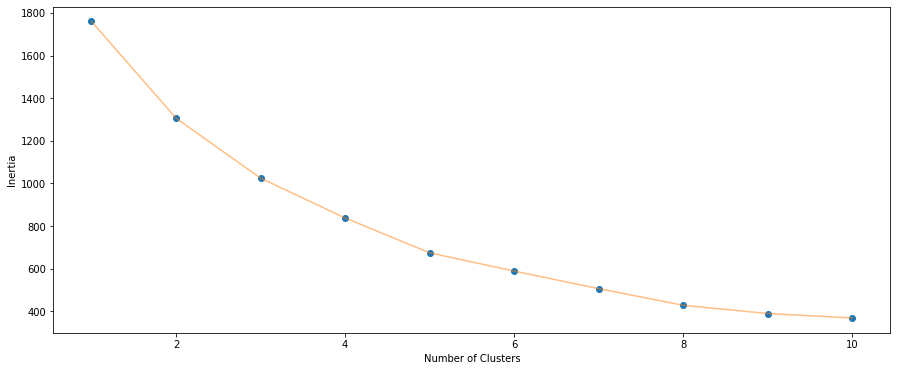

In [88]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

inertia = []

for n in range(1 , 11):
    clf = KMeans(n_clusters = n , random_state= 1984)
    clf.fit(X)
    inertia.append(clf.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

plt.show() 

In [83]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 2 , random_state= 1984)  

# from sklearn.cluster import AgglomerativeClustering
# clf = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  

clf.fit(X)

labels = clf.labels_

print(labels)
print(pd.DataFrame(labels).value_counts())

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1]
1    399
0     41
dtype: int64


# 4. Caracterizando os grupos 

In [84]:
centroids = clf.cluster_centers_
centroids

array([[ 0.14348038,  2.23738939,  2.19373558,  0.4447887 ],
       [-0.0147436 , -0.22990718, -0.22542145, -0.0457051 ]])

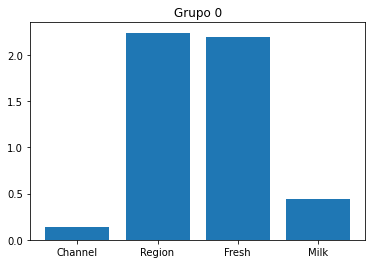

In [85]:
plt.bar(x=X.columns,height=centroids[0])
plt.title('Grupo 0')
plt.show()

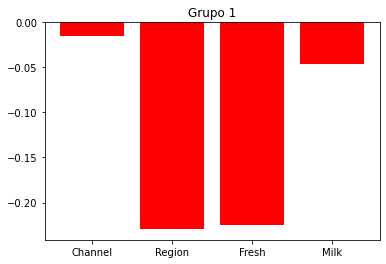

In [86]:
plt.bar(x=X.columns,height=centroids[1],color='red')
plt.title('Grupo 1')
plt.show()